#  Designing a Perceptron algorithm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import PIL
from PIL import Image
from numpy import asarray


In [3]:
#converting from train images to points
points=np.empty([2400,785])
for i in range(1,2401):
    path =r'C:\Users\ahmed\Desktop\Machine Learing\Assignments\Train/'+ str(i)+'.jpg'
    an_image = PIL.Image.open(path)
    image_sequence = an_image.getdata()
    image_array = np.array(image_sequence)
    image_array = np.append (image_array,[1])
    x=image_array.reshape(1,785) 
    points[i-1]=x    

In [4]:
#converting from test images to points
test_points=np.empty([200,785])
for i in range(1,201):
    path =r'C:\Users\ahmed\Desktop\Machine Learing\Assignments\Test/'+str(i)+'.jpg'
    an_image = PIL.Image.open(path)
    image_sequence = an_image.getdata()
    image_array = np.array(image_sequence)
    image_array = np.append (image_array,[1])
    x=image_array.reshape(1,785) 
    test_points[i-1]=x    

In [4]:
#reading train labels
f=open(r'C:\Users\ahmed\Desktop\Machine Learing\Assignments\Train\Training labels.txt', mode='r')
l=f.read()
labels=[]
for i in range(0,4800):
    if (i%2==0):
        labels.append(l[i])

In [5]:
#reading test labels
f=open(r'C:\Users\ahmed\Desktop\Machine Learing\Assignments\Test\Test labels.txt', mode='r')
l=f.read()
test_labels=[]
for i in range(0,400):
    if (i%2==0):
        test_labels.append(l[i])  
        
for i in range(0,200):
    if (test_labels[i]=='0'):
        test_labels[i]=0
    elif (test_labels[i]=='1'):
        test_labels[i]=1
    elif (test_labels[i]=='2'):
        test_labels[i]=2
    elif (test_labels[i]=='3'):
        test_labels[i]=3
    elif (test_labels[i]=='4'):
        test_labels[i]=4
    elif (test_labels[i]=='5'):
        test_labels[i]=5
    elif (test_labels[i]=='6'):
        test_labels[i]=6
    elif (test_labels[i]=='7'):
        test_labels[i]=7
    elif (test_labels[i]=='8'):
        test_labels[i]=8
    elif (test_labels[i]=='9'):
        test_labels[i]=9


In [6]:
#returns a new w
def perceptron_classifier(w,point,n,t):
    point=point.reshape(785,1)
    Nw=w+n*point*t
    return Nw

In [7]:
#must be called like this target_filler(labels[i]) or target_filler('0') ,labels[0]='0'not 0 / returns train target
def target_filler(x):
    t=[]
    for i in range (0,2400):
        if (labels[i]==x):
            t.append(1)
        else:
            t.append(-1)
    return t            

In [8]:
#must be called like this test_target_filler(labels[i]) or target_filler('0') ,labels[0]='0'not 0 / returns test target
def test_target_filler(x):
    t=[]
    for i in range (0,200):
        if (test_labels[i]==x):
            t.append(1)
        else:
            t.append(-1)
    return t   

In [52]:
#returns w for each class and n 
def perceptron(t,n):
    w=np.zeros([785,1])
    w[0]=1
    i=0
    c=0
    while (i<2400 and c<=500):
        e=0
        p=points[i].reshape(785,1)
        e=w.T@p*t[i]
        if(e<0):
            w=perceptron_classifier(w,points[i],n,t[i])
            i=0
            c+=1
        else:
            i+=1
    return w

In [53]:
#returns a 785x10 array each column contains a w 
def Ws_for_each_learning_rate(n):
    w_all=np.zeros([785,1])
    for i in range(0,10):
        t=target_filler(labels[i*240])
        w=perceptron(t,n)
        w=w.reshape(785,1)
        w_all=np.append(w_all, w, axis=1)
    w_all=np.delete(w_all, 0, 1)
    return w_all

In [54]:
#returns predictions for a specific n
def test(Ws):  
    pred_labels=np.empty([200])
    index=0
    for i in range (0,200):
        largest=0
        p=test_points[i].reshape(785,1)
        for j in range(0,10):
            w=Ws[:,j]
            w=w.reshape(785,1)
            e=w.T@p
            if(largest<e):
                largest=e
                index=j
        pred_labels[i]=index
    return pred_labels

In [55]:
def accuracy(pred):
    c=0
    for i in range(0,200):
        if (pred[i]==test_labels[i]):
            c+=1
    acc=(c/200)*100
    return acc

In [56]:
def get_missclassified(Ws):
    all_missclassified=np.empty([10])
    for i in range(0,10):
        miss=0
        w=Ws[:,i]
        t=target_filler(labels[i*240])
        w=w.reshape(785,1)
        for j in range (0,2400):
            if((w.T@points[j]*t[j])<0):
                miss+=1
        all_missclassified[i]=miss
    return all_missclassified

In [ ]:
M1=get_missclassified(Ws1)
M2=get_missclassified(Ws2)
M3=get_missclassified(Ws3)
M4=get_missclassified(Ws4)
M5=get_missclassified(Ws5)
M6=get_missclassified(Ws6)
M7=get_missclassified(Ws7)
M8=get_missclassified(Ws8)
M9=get_missclassified(Ws9)
M10=get_missclassified(Ws10)
Ms=np.delete(Ms, 0, 0)

In [ ]:
Ms=np.empty([1,10])
Ms=np.append(Ms, M1.reshape(1,10), axis=0)
Ms=np.append(Ms, M2.reshape(1,10), axis=0)
Ms=np.append(Ms, M3.reshape(1,10), axis=0)
Ms=np.append(Ms, M4.reshape(1,10), axis=0)
Ms=np.append(Ms, M5.reshape(1,10), axis=0)
Ms=np.append(Ms, M6.reshape(1,10), axis=0)
Ms=np.append(Ms, M7.reshape(1,10), axis=0)
Ms=np.append(Ms, M8.reshape(1,10), axis=0)
Ms=np.append(Ms, M9.reshape(1,10), axis=0)
Ms=np.append(Ms, M10.reshape(1,10), axis=0)

Ms=np.delete(Ms, 0, 0)

In [47]:
#"takes around 10 minutes"
Ws1=Ws_for_each_learning_rate(10**0)
Ws2=Ws_for_each_learning_rate(10**-1)
Ws3=Ws_for_each_learning_rate(10**-2)
Ws4=Ws_for_each_learning_rate(10**-3)
Ws5=Ws_for_each_learning_rate(10**-4)
Ws6=Ws_for_each_learning_rate(10**-5)
Ws7=Ws_for_each_learning_rate(10**-6)
Ws8=Ws_for_each_learning_rate(10**-7)
Ws9=Ws_for_each_learning_rate(10**-8)
Ws10=Ws_for_each_learning_rate(10**-9)

In [48]:
#returns array, each rows contains predictions of each n
all_pred_labels=np.zeros([10,200])
all_pred_labels[0]=test(Ws1)
all_pred_labels[1]=test(Ws2)
all_pred_labels[2]=test(Ws3)
all_pred_labels[3]=test(Ws4)
all_pred_labels[4]=test(Ws5)
all_pred_labels[5]=test(Ws6)
all_pred_labels[6]=test(Ws7)
all_pred_labels[7]=test(Ws8)
all_pred_labels[8]=test(Ws9)
all_pred_labels[9]=test(Ws10)


done
done
done
done
done
done
done
done
done
done


In [50]:
#returns accuracy of all Ns
all_acc=np.empty([10])
n=1
for i in range(0,10):
    all_acc[i]=accuracy(all_pred_labels[i])
    n=n/10
for i in range(0,10):
    if (i==0):
        print("accuracy for learning rate 1", "=" ,all_acc[i])
    else:
        print("accuracy for learning rate 10**-",i, "=",all_acc[i])

accuracy for learning rate 1 = 70.0
accuracy for learning rate 10**- 1 = 70.0
accuracy for learning rate 10**- 2 = 70.0
accuracy for learning rate 10**- 3 = 68.5
accuracy for learning rate 10**- 4 = 62.0
accuracy for learning rate 10**- 5 = 69.0
accuracy for learning rate 10**- 6 = 70.0
accuracy for learning rate 10**- 7 = 63.5
accuracy for learning rate 10**- 8 = 23.0
accuracy for learning rate 10**- 9 = 10.0


In [41]:
#Confusion Matrix

def getRow(i):
    r=0 
    if (test_labels[i]==0):
        r=0
    elif (test_labels[i]==1):
        r=1
    elif (test_labels[i]==2):
        r=2
    elif (test_labels[i]==3):
        r=3
    elif (test_labels[i]==4):
        r=4
    elif (test_labels[i]==5):
        r=5
    elif (test_labels[i]==6):
        r=6
    elif (test_labels[i]==7):
        r=7
    elif (test_labels[i]==8):
        r=8
    elif (test_labels[i]==9):
        r=9
    return r

def getCoulmn(pred_labels,i):
    c=0
    if (pred_labels[i]==0):
        c=0
    elif (pred_labels[i]==1):
        c=1
    elif (pred_labels[i]==2):
        c=2
    elif (pred_labels[i]==3):
        c=3
    elif (pred_labels[i]==4):
        c=4
    elif (pred_labels[i]==5):
        c=5
    elif (pred_labels[i]==6):
        c=6
    elif (pred_labels[i]==7):
        c=7
    elif (pred_labels[i]==8):
        c=8
    elif (pred_labels[i]==9):
        c=9
    return c


In [66]:
#confusion matrix
def get_conf_matrix(pred_labels):
    classes=[0,1,2,3,4,5,6,7,8,9]
    conf_array=[[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]
    for i in range(0,200):
        conf_array[getRow(i)][getCoulmn(pred_labels,i)]+=1
    
    conf_matrix=np.array(conf_array).reshape(10,10)
    cfm_DF= pd.DataFrame(conf_matrix, index = classes, columns = classes)
    cfm_plot = sn.heatmap(cfm_DF, annot=True)
    return cfm_plot

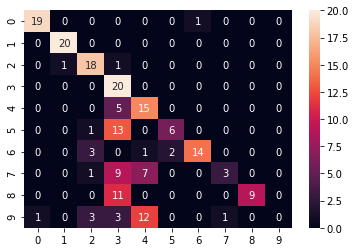

In [88]:
#n=1
cfm1=get_conf_matrix(all_pred_labels[0])
cfm1.figure.savefig("cfm1.png")


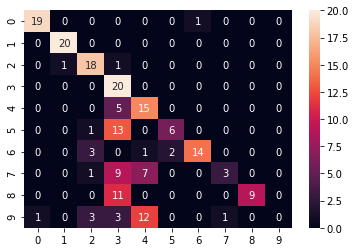

In [89]:
#n=10**-1
cfm2=get_conf_matrix(all_pred_labels[1])
cfm2.figure.savefig("cfm2.png")


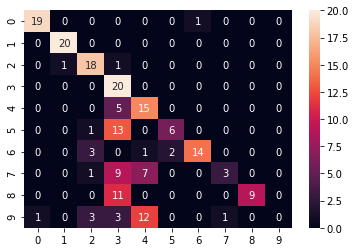

In [90]:
#n=10**-2
cfm3=get_conf_matrix(all_pred_labels[2])
cfm3.figure.savefig("cfm3.png")

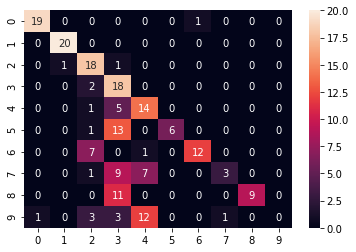

In [91]:
#n=10**-3
cfm4=get_conf_matrix(all_pred_labels[3])
cfm4.figure.savefig("cfm4.png")


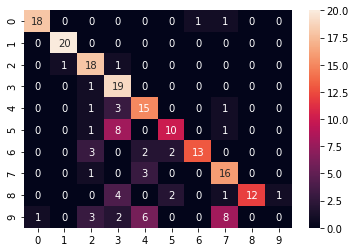

In [92]:
#n=10**-4
cfm5=get_conf_matrix(all_pred_labels[4])
cfm5.figure.savefig("cfm5.png")


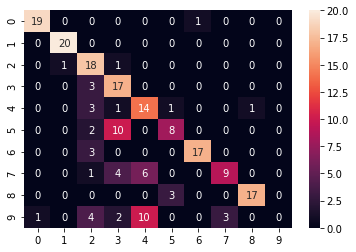

In [93]:
#n=10**-5
cfm6=get_conf_matrix(all_pred_labels[5])
cfm6.figure.savefig("cfm6.png")


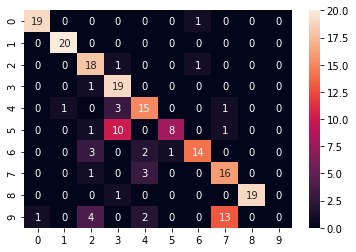

In [94]:
#n=10**-6
cfm7=get_conf_matrix(all_pred_labels[6])
cfm7.figure.savefig("cfm7.png")


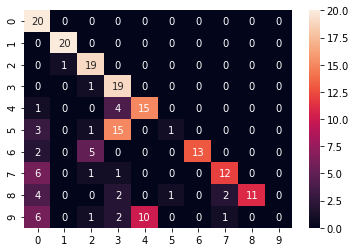

In [95]:
#n=10**-7
cfm8=get_conf_matrix(all_pred_labels[7])
cfm8.figure.savefig("cfm8.png")

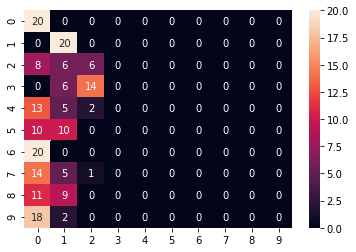

In [96]:
#n=10**-8
cfm9=get_conf_matrix(all_pred_labels[8])
cfm9.figure.savefig("cfm9.png")

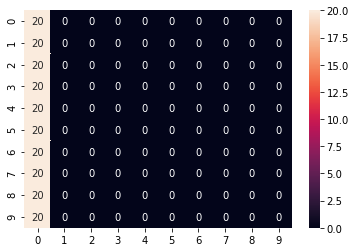

In [97]:
#n=10**-9
cfm10=get_conf_matrix(all_pred_labels[9])
cfm10.figure.savefig("cfm10.png")

In [12]:
# def get_errors(ws):
#     errors=np.empty([10,1])
#     for i in range(0,10):
#         err=0
#         t=test_target_filler(test_labels[i*20])
#         for j in range(0,200):
#             q=ws[i].T@test_points[j]*t[j]
#             if(q<0):
#                 err+=1
#         errors[i]=err

In [ ]:
###############################################################
largest=0
for j in range(4*20,5*20):
    w=l[:,4]
    w.reshape(785,1)
    #pTrain=points[j].reshape(785,1)
    pTest=test_points[j].reshape(785,1)
    e=w.T@pTest

In [ ]:
t=target_filler('9')
wo=perceptron(t,1)

In [ ]:
#proof that Ws are correct
c=0
k=9
t=target_filler('9')
w=l[:,k]
for i in range(k*240,(k+1)*240):
    p=points[i].reshape(785,1)
    #e=w.T@p*t[i]
    e=wo.T@p*t[i]
    if(e>0):
        c+=1
c